# Classifying Spotify musics with SVM

In [1]:
import sklearn
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

Loading Iris

In [2]:
iris = datasets.load_iris()

Specifying train and classes

In [3]:
train   = iris.data
classes = iris.target

trainingdata = train[:-30]
trainingdata

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
trainingclasses = classes[:-30]

We're using 80% for training and 20% for testing

In [5]:
clf = svm.SVC().fit(trainingdata,trainingclasses)

In [6]:
testing_data    = train[-30:]
testing_data_predict = clf.predict(testing_data)

In [7]:
testing_data_predict

array([2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
classes[-30:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Plotting data

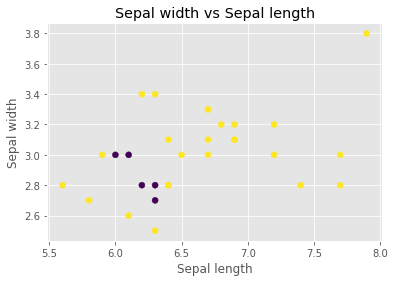

In [9]:
style.use('ggplot')
#sepal length vs sepal width
plt.plot()
plt.title('Sepal width vs Sepal length')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(train[-30:,0],train[-30:,1], c=testing_data_predict)

It only missed 5 point out of 30

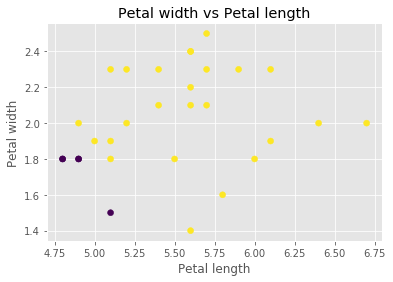

In [10]:
style.use('ggplot')
#petal length vs width
plt.plot()
plt.title('Petal width vs Petal length')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(train[-30:,2], train[-30:,3], c=testing_data_predict)

Using cross validation 

In [11]:
def accuracy(clf, x, y):
    results = cross_val_predict(clf, x, y, cv=5)
    return accuracy_score(y, results)

In [12]:
accuracy(clf,train,classes)

0.98

We got 98% of accuracy for this specific dataset, let's try a bigger one

### Now, we're going to use a Spotify dataset, trying to predict whether someone will like a music or not.

In [2]:
df = pd.read_csv('../datasets/data.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [3]:
df['target'].value_counts()
df_classes = df['target']

We can notice that likes and not likes (1 or 0) are quite balanced. Let's verify if we missed any value.

In [4]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

Let's check some statistics for our dataset.

In [5]:
df.describe()

Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

Plotting the dispersion graph to check possible patterns.

#### According to Spotify: 
Danceability describes how suitable a track is for dancing 
    based on a combination of musical elements including tempo, rhythm stability, 
    beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Acousticness is confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
1.0 represents high confidence the track is acoustic.

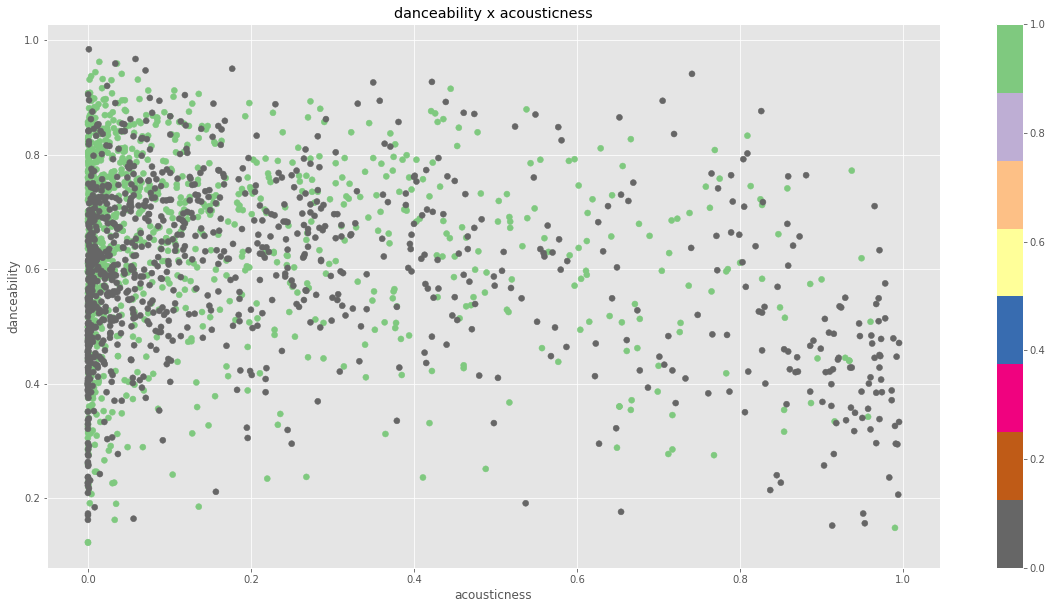

In [17]:
style.use('seaborn-colorblind')
plt.figure(figsize=(20, 10))
plt.plot()
plt.title('danceability x acousticness')
plt.xlabel('acousticness')
plt.ylabel('danceability')
df_ac = df['acousticness']
df_dance = df['danceability']
sc = plt.scatter(df_ac, df_dance, c=df['target'], cmap='Accent_r')
plt.colorbar(sc)

Tempo is: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, 
    tempo is the speed or pace of a given piece and derives directly from the average beat duration.

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), 
while tracks with low valence sound more negative (e.g. sad, depressed, angry).

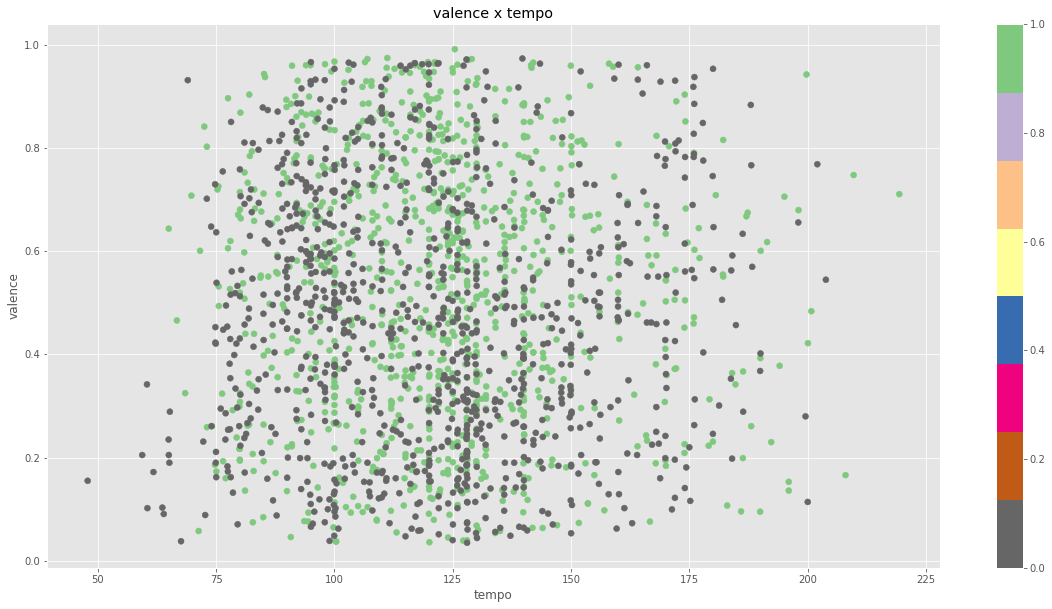

In [18]:
style.use('seaborn-colorblind')
plt.figure(figsize=(20, 10))
plt.plot()
plt.title('valence x tempo')
plt.ylabel('valence')
plt.xlabel('tempo')
df_valence = df['valence']
df_tempo = df['tempo']
sc = plt.scatter(df_tempo, df_valence, c=df['target'], cmap='Accent_r')
plt.colorbar(sc)

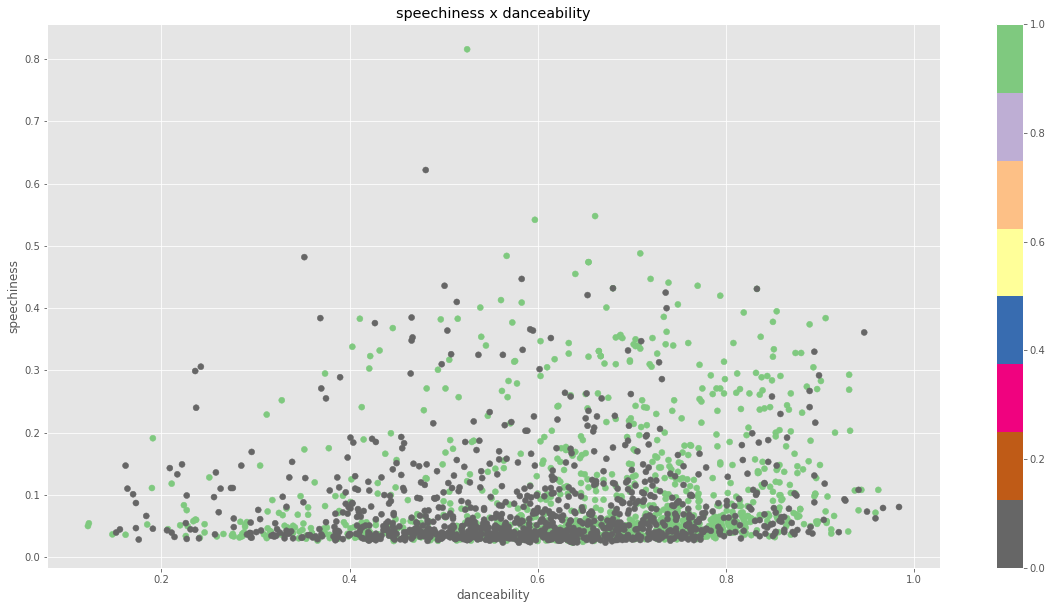

In [19]:
style.use('seaborn-colorblind')
plt.figure(figsize=(20, 10))
plt.plot()
plt.title('speechiness x danceability')
plt.ylabel('speechiness')
plt.xlabel('danceability')
df_sp = df['speechiness']
sc = plt.scatter(df_dance, df_sp, c=df['target'], cmap='Accent_r')
plt.colorbar(sc)

Now, we're going to begin our data pre-processing. 

In [20]:
def remove_features(list_features):
    for i in list_features:
        df.drop(i, axis=1, inplace=True)

In [72]:
remove_features(['song_title'])
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1,inplace=True)
df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target  int_artist  
0       1         449  
1       1         222  
2       1         449  
3       1          95  
4       1         628

In [73]:
df['artist'].describe()

KeyError: 'artist'

Our 'Artist' column is categorical, so we need to treat it.

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [75]:
enc = LabelEncoder()
integers = enc.fit_transform(df['artist'])
df['int_artist'] = integers
remove_features(['artist'])

KeyError: 'artist'

In [76]:
integers

array([[ 449],
       [ 222],
       [ 449],
       ...,
       [ 947],
       [1242],
       [ 132]])

In [77]:
df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target  int_artist  
0       1         449  
1       1         222  
2       1         449  
3       1          95  
4       1         628

Now we use OneHotEnconder for the 'int_artists' column.

## Using OneEnconder

In [78]:
ohe = OneHotEncoder()
df_array = df.values
df_array

array([[1.02000e-02, 8.33000e-01, 2.04600e+05, ..., 2.86000e-01,
        1.00000e+00, 4.49000e+02],
       [1.99000e-01, 7.43000e-01, 3.26933e+05, ..., 5.88000e-01,
        1.00000e+00, 2.22000e+02],
       [3.44000e-02, 8.38000e-01, 1.85707e+05, ..., 1.73000e-01,
        1.00000e+00, 4.49000e+02],
       ...,
       [8.57000e-03, 6.37000e-01, 2.07200e+05, ..., 4.70000e-01,
        0.00000e+00, 9.47000e+02],
       [1.64000e-03, 5.57000e-01, 1.85600e+05, ..., 6.23000e-01,
        0.00000e+00, 1.24200e+03],
       [2.81000e-03, 4.46000e-01, 2.04520e+05, ..., 4.02000e-01,
        0.00000e+00, 1.32000e+02]])

In [79]:
integers = integers.reshape(len(integers),1)
integers

array([[ 449],
       [ 222],
       [ 449],
       ...,
       [ 947],
       [1242],
       [ 132]])

In [80]:
new_feat = ohe.fit_transform(integers)
array_feat = new_feat.toarray()

In [81]:
df_array = np.concatenate([df_array, array_feat], axis=1)
df_array.shape

(2017, 1358)

In [82]:
df_shaped = pd.DataFrame(df_array)
df_shaped

0      1         2      3         4     5       6       7     8     \
0     0.010200  0.833  204600.0  0.434  0.021900   2.0  0.1650  -8.795   1.0   
1     0.199000  0.743  326933.0  0.359  0.006110   1.0  0.1370 -10.401   1.0   
2     0.034400  0.838  185707.0  0.412  0.000234   2.0  0.1590  -7.148   1.0   
3     0.604000  0.494  199413.0  0.338  0.510000   5.0  0.0922 -15.236   1.0   
4     0.180000  0.678  392893.0  0.561  0.512000   5.0  0.4390 -11.648   0.0   
5     0.004790  0.804  251333.0  0.560  0.000000   8.0  0.1640  -6.682   1.0   
6     0.014500  0.739  241400.0  0.472  0.000007   1.0  0.2070 -11.204   1.0   
7     0.020200  0.266  349667.0  0.348  0.664000  10.0  0.1600 -11.609   0.0   
8     0.048100  0.603  202853.0  0.944  0.000000  11.0  0.3420  -3.626   0.0   
9     0.002080  0.836  226840.0  0.603  0.000000   7.0  0.5710  -7.792   1.0   
10    0.057200  0.525  358187.0  0.855  0.014300   5.0  0.6490  -7.372   0.0   
11    0.091500  0.753  324880.0  0.748  0.003480  10.0  0.2120  -8.620   1.0   
12    0.253000  0.603  356973.0  0.434  0.061900   0.0  0.1080 -11.062   1.0   
13    0.366000  0.762  243270.0  0.476  0.000000   0.0  0.1030 -12.686   1.0   
14    0.440000  0.662  247288.0  0.603  0.000000   9.0  0.0972  -8.317   0.0   
15    0.019000  0.637  188333.0  0.832  0.056300   6.0  0.3160  -6.637   1.0   
16    0.023900  0.603  270827.0  0.955  0.045100   1.0  0.1190  -4.111   1.0   
17    0.233000  0.789  447907.0  0.659  0.000490   4.0  0.1840 -12.654   0.0   
18    0.314000  0.713  195429.0  0.611  0.000000   1.0  0.1170  -6.702   0.0   
19    0.024200  0.735  214347.0  0.759  0.185000   1.0  0.0966  -6.914   0.0   
20    0.000702  0.854  249253.0  0.719  0.308000  10.0  0.4280  -9.335   0.0   
21    0.000240  0.747  307680.0  0.740  0.369000   1.0  0.0995  -4.134   1.0   
22    0.118000  0.854  287086.0  0.401  0.000000   9.0  0.5270  -8.553   1.0   
23    0.000596  0.224  132760.0  0.925  0.000001  11.0  0.0663  -1.710   0.0   
24    0.279000  0.512  203400.0  0.564  0.000015  10.0  0.1330  -5.892   1.0   
25    0.002190  0.781  205160.0  0.795  0.269000   7.0  0.0673  -6.758   1.0   
26    0.341000  0.411  199500.0  0.684  0.000001  11.0  0.1980  -6.889   0.0   
27    0.018000  0.646  188333.0  0.837  0.040300   6.0  0.3160  -6.615   1.0   
28    0.051600  0.782  228562.0  0.572  0.000000   4.0  0.3300  -7.467   0.0   
29    0.282000  0.735  186096.0  0.400  0.125000   1.0  0.0811 -12.766   1.0   
...        ...    ...       ...    ...       ...   ...     ...     ...   ...   
1987  0.028300  0.421  175907.0  0.831  0.000000   4.0  0.4640  -5.128   1.0   
1988  0.000084  0.467  209187.0  0.794  0.002040   1.0  0.1030  -6.174   0.0   
1989  0.000797  0.480  222053.0  0.826  0.000001   0.0  0.1250  -4.602   1.0   
1990  0.000590  0.594  218720.0  0.858  0.000003   9.0  0.0642  -4.339   1.0   
1991  0.000366  0.544  245133.0  0.788  0.000000   5.0  0.1410  -5.593   0.0   
1992  0.007490  0.446  241253.0  0.881  0.000000   2.0  0.1300  -4.368   1.0   
1993  0.001900  0.551  195280.0  0.732  0.000000   9.0  0.0764  -6.081   1.0   
1994  0.510000  0.630  240000.0  0.772  0.000023   1.0  0.0881  -6.986   1.0   
1995  0.020200  0.333  174240.0  0.913  0.000000   2.0  0.1460  -3.722   1.0   
1996  0.003630  0.743  259889.0  0.889  0.143000  10.0  0.3830  -5.567   1.0   
1997  0.000870  0.465  265600.0  0.953  0.014600   8.0  0.2260  -4.684   0.0   
1998  0.031600  0.680  211853.0  0.725  0.000018   6.0  0.1120  -3.920   1.0   
1999  0.004990  0.619  245656.0  0.949  0.000418   6.0  0.1790  -4.640   0.0   
2000  0.093500  0.520  231667.0  0.809  0.003500   1.0  0.0939  -4.180   1.0   
2001  0.002620  0.484  224320.0  0.609  0.000000  11.0  0.3390  -5.652   0.0   
2002  0.030100  0.583  224092.0  0.891  0.000003   7.0  0.1290  -3.495   1.0   
2003  0.000461  0.562  201031.0  0.960  0.038300   9.0  0.7160  -2.981   1.0   
2004  0.096900  0.595  198400.0  0.975  0.000000   8.0  0.1020  -2.339   0.0   
2005  0.02

In [14]:
pip_1 = Pipeline([
('scaler', StandardScaler()),
('clf', svm.SVC())
])
 
pip_2 = Pipeline([
('min_max_scaler', MinMaxScaler()),
('clf', svm.SVC())
])

In [84]:
accuracy(pip_1, df_array, df_classes)

0.961824491819534

In [85]:
accuracy(pip_2, df_array, df_classes)

1.0

## Label Encoder

In [36]:
dataset = pd.read_csv('../datasets/data.csv', sep=',')

In [56]:
classes = dataset['target']
dataset.drop('target', axis=1, inplace=True)
dataset.drop(dataset.columns[dataset.columns.str.contains('Unnamed',case = False)],axis = 1,inplace=True)

In [38]:
def remove_data_features(list_features):
    for i in list_features:
        dataset.drop(i, axis=1, inplace=True)

In [39]:
remove_data_features(['song_title'])

In [57]:
enc = LabelEncoder()
inteiros = enc.fit_transform(dataset['artist'])
dataset['artist_inteiros'] = inteiros

KeyError: 'artist'

In [58]:
remove_data_features(['artist'])

ValueError: labels ['artist'] not contained in axis

In [59]:
dataset.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   artist_inteiros  
0              449  
1              222  
2              449  
3               95  
4              628

In [60]:
accuracy(pip_1,dataset,classes)

0.676251859196827

In [61]:
accuracy(pip_2,dataset,classes)

0.5889935547843331

## Using getdummies

In [9]:
dataset_pd = pd.get_dummies(df, columns=['artist'], prefix=['artist'])
dataset_pd.drop(dataset_pd.columns[dataset_pd.columns.str.contains('Unnamed',case = False)],axis = 1,inplace=True)

In [10]:
dataset_pd.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1358)

In [15]:
accuracy_score(pip_1,dataset_pd,df_classes)

TypeError: Expected sequence or array-like, got estimator Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])